Shape: (349, 10)
       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease         

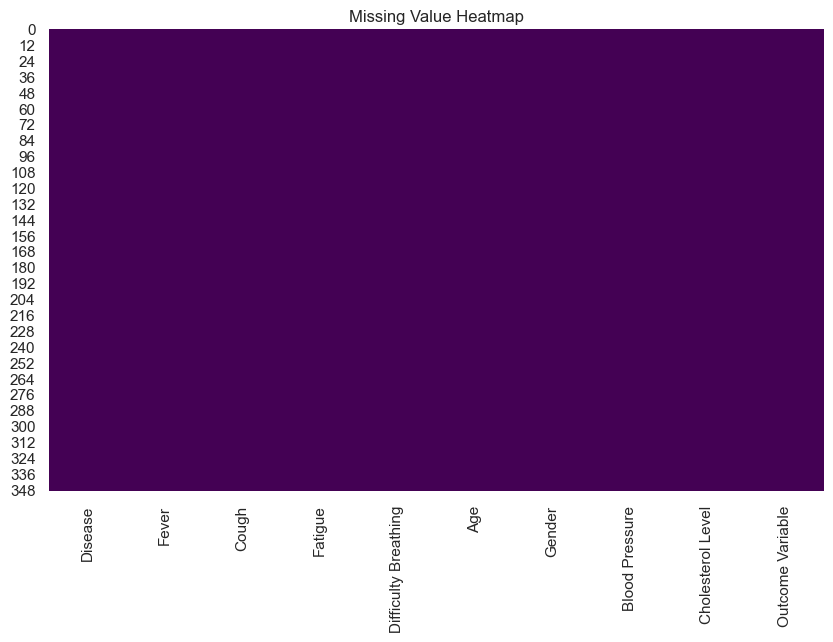

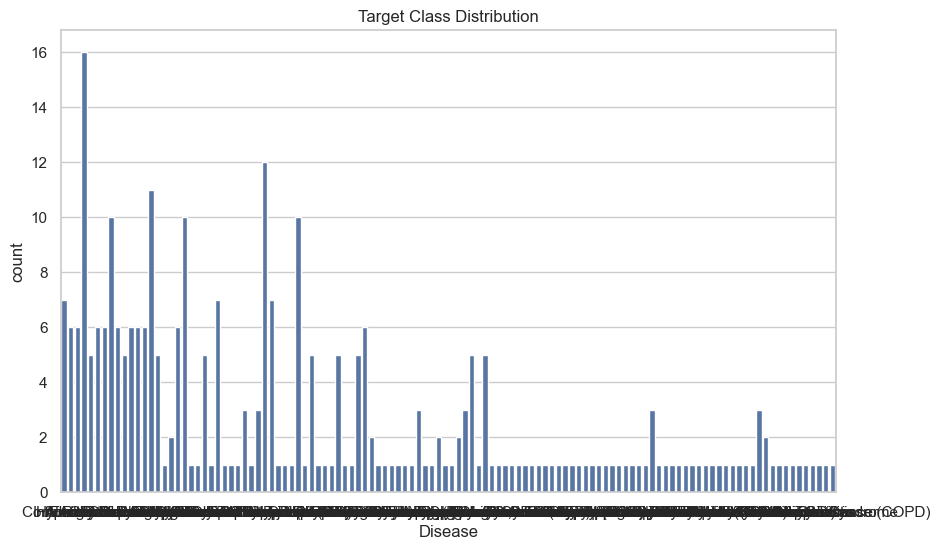

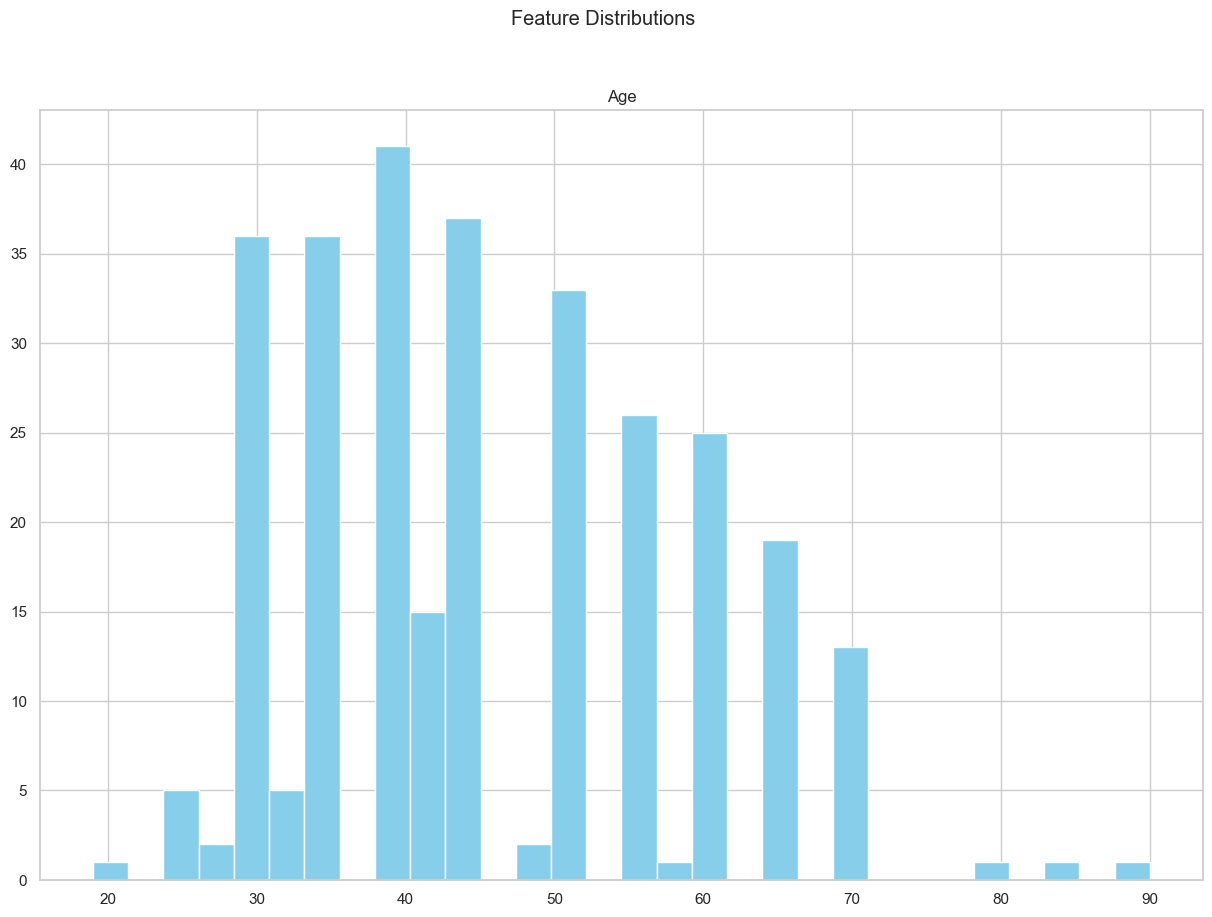

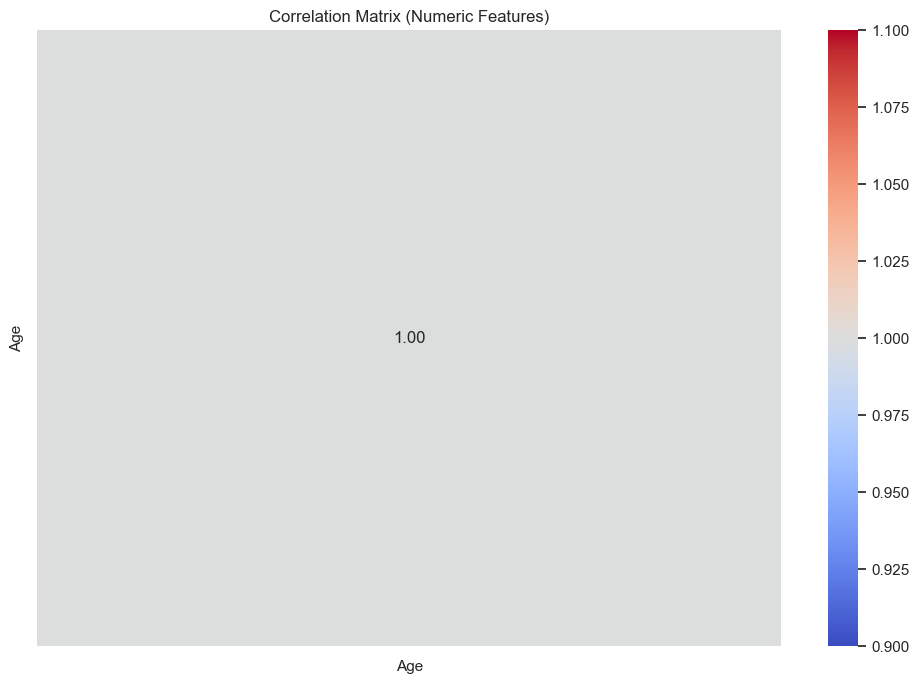


Logistic Regression Results
Accuracy: 0.08333333333333333
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.30      0.75      0.43         4
          13       0.25      0.50      0.33         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         1
          40       0.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -------------------------
# Step 1: Load the Dataset
# -------------------------
df = pd.read_csv("D:/VEDA Project/ai-healthcare-disease-prediction/data/dataset.csv")
print("Shape:", df.shape)
print(df.head())
print(df.info())

# -----------------------------
# Step 2: Data Cleaning
# -----------------------------
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Drop rows with missing values
df = df.dropna()

# Drop duplicates
df = df.drop_duplicates()

# -----------------------------
# Step 3: Exploratory Data Analysis (EDA)
# -----------------------------
# Distribution of target
if 'Disease' in df.columns:
    sns.countplot(x='Disease', data=df)
    plt.title("Target Class Distribution")
    plt.show()

# Histograms for numeric features
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap (numeric only to avoid string conversion errors)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# -----------------------------
# Step 4: Preprocessing
# -----------------------------
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
if 'Disease' not in df.columns:
    raise ValueError("Target column not found in dataset. Please ensure it's named 'Disease'.")

X = df.drop('Disease', axis=1)
y = df['Disease']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -----------------------------
# Step 5: Model Training
# -----------------------------
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -----------------------------
# Step 6: Evaluation
# -----------------------------
models = {'Logistic Regression': lr, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    # ROC AUC (only for binary classification)
    if hasattr(model, "predict_proba") and len(np.unique(y_test)) == 2:
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot ROC curve only if applicable
if len(np.unique(y_test)) == 2:
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()
else:
    print("ROC curve is not applicable for multiclass classification.")


# -----------------------------
# Step 7: Save the Best Model
# -----------------------------
# Save Random Forest model
with open("heart_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nModel, encoders, and scaler saved successfully.")


In [ ]:
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


In [ ]:
print("Columns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


In [ ]:
X = df.drop('Disease', axis=1)
y = df['Disease']


In [ ]:
# ROC AUC not supported for multiclass directly in this form
print(f"Note: ROC Curve skipped for {name} as the task is multiclass.")


Note: ROC Curve skipped for Logistic Regression as the task is multiclass.


In [ ]:
# -----------------------------
# Step 6: Evaluation
# -----------------------------
models = {'Logistic Regression': lr, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    # ROC AUC (only for binary classification)
    if hasattr(model, "predict_proba") and len(np.unique(y_test)) == 2:
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot ROC curve only if applicable
if len(np.unique(y_test)) == 2:
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()
else:
    print("ROC curve is not applicable for multiclass classification.")



Logistic Regression Results
Accuracy: 0.08333333333333333
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.30      0.75      0.43         4
          13       0.25      0.50      0.33         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         1
          40       0.

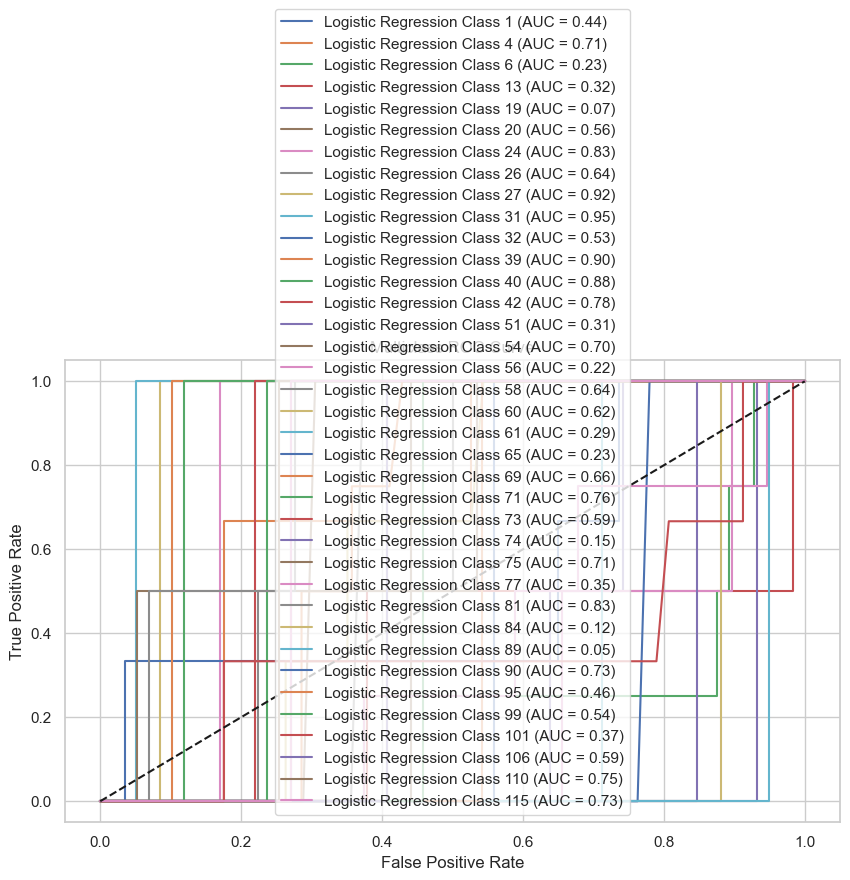

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# Binarize y_test for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()
